## Earth's Atmospheric Composition: Computer Laboratory #1

Paul Palmer, University of Edinburgh (paul.palmer@ed.ac.uk)

### Contents:

The learning objectives of this lab are:
1. Understand what is an e-folding lifetime.
2. Understand what determines the lifetime of a gas that is subject to different loss processes.
3. Understand the relevance of an e-folding lifetime is to atmospheric composition.

This is a [Jupyter](https://www.jupyter.org "Jupyter's Homepage") notebook, which allows you to use the power of Python without much knowledge of the language.

**To run the code below:**
1. Click on the cell to select it.
2. Press SHIFT+ENTER on your keyboard or press the play button () in the toolbar above.

### Exercise #1: Box model describing time-dependent mass of gas X


<img src="http://www.geos.ed.ac.uk/~ppalmer/jupyter/images/massbalance.jpg">


The following equation is a simple mass balance model that describes the change in mass of gas $X$ as a function of time $t$:
\begin{equation}
\frac{dX}{dt} = S - \frac{X}{\tau}, 
\end{equation}
where mass is determined by a source $S$ (mass/time) and a loss that is described by an e-folding lifetime $\tau$ (time). 

Rearranging and integrating this equation:
\begin{equation}
X(t)=X_0\exp^{-\frac{t}{\tau}},
\end{equation}
where $X_0$ is the carbon mass at time $t=0$.


The following piece of code describes this equation. In this example, we have ignored $S$ ($S$=0), used $\tau=20$ seconds and X$_0$=10 units. Below we explore the role of $S$ in the model.

Text(0.5,1,'$C(t)=C_0\\exp^{-t/tau}$')

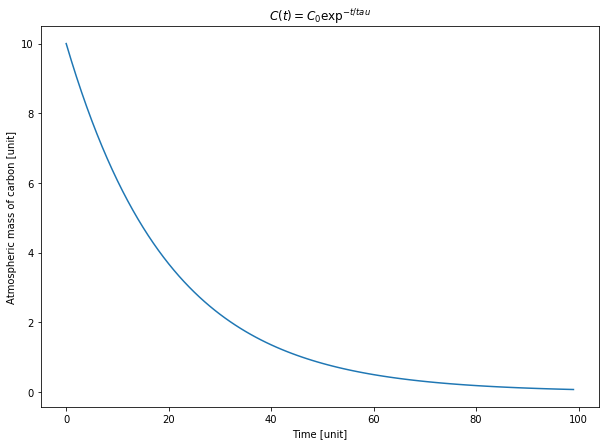

In [11]:
%matplotlib inline
from ipywidgets import widgets, interact, interactive
from IPython.display import clear_output, display, HTML

import numpy as np
import pylab as plt
import math

tau = 20. # 1/seconds
c_0 = 10.
c = []
t = np.arange(100)

for ii in np.arange(len(t)): c.append(c_0*np.exp(-t[ii]/tau))

plt.figure(figsize=(10,7))
plt.plot(t,c)
plt.xlabel('Time [unit]')
plt.ylabel('Atmospheric mass of carbon [unit]')
plt.title('$C(t)=C_0\exp^{-t/tau}$')


We can explore a few key concepts with this simple model: 1) e-folding lifetime and 2) mass balance. 

From the figure above we can see that in the absence of a source the carbon mass progressively gets smaller, which is determined by $\tau$. Every time $t$ increases by a factor of $\tau$ the carbon mass is reduced by a factor of $e$, which has a value of approximately 2.72. At $t$=$\tau$, $C(\tau)=C_0\exp^{-1}$ and when $t=2\tau$, $C(2\tau) = C_0\exp^{-2}$. For the example above (using $C_0 = 10$ units) $C(\tau) = 10\exp^{-1} = 3.68$, $C(2\tau) = 10\exp^{-2} = 1.35$, ...

Below is an interactive version of the static figure above. The vertical and horizontal lines are giving you the corresponding values for $t$ and $C(t)$ for $t$=$\tau$ and $2\tau$. 

#### Activities
0. Use the slider to explore how the lifetime affects $C(t)$

<font color='red'>
What you should find is that when you increase (decrease) the e-folding lifetime by moving the slider to the right (left) the concentration of pollutant level decreases more rapidly (slowly). 
</font>

1. Make sure you understand why in this model $C(t)$ reduces in a way that can be described by multiples of $e$.

<font color='red'>
Recall from above (and in your notes): $C(t)=C_0\exp^{-\frac{t}{\tau}}$. 
So that if you define $\tau$=25 and $C_0$ = 10, at time = 25 the expression becomes: $C(t)=\exp^{-1}$.
If you assume $exp^{-1} = 0.37$ then $C(\tau)$ = 37. 
Similarly, $C(2\tau) = \exp^{-2}$ or 1.4 
</font>

2. What is the value of $C(3\tau)$? Double check by adjusting the code. 

<font color='red'>
If you follow the logic above, then $C(3\tau) = \exp^{-3} = 0.5$. I have added a line in the code below to double check this value.
</font>

In [12]:
%matplotlib inline
from ipywidgets import widgets, interact, interactive
from IPython.display import clear_output, display, HTML

import numpy as np
import pylab as plt
import math

def lifetime(tau):
    c_0 = 10.
    c = []  
    t = np.arange(100)
    for ii in np.arange(len(t)): c.append(c_0*np.exp(-t[ii]/tau))

    plt.figure(figsize=(10,7))
    plt.plot(t,c)
    
    # one e-folding lifetime
    cefold = np.exp(-1)*c_0
    # two e-folding lifetimes
    twocefold = np.exp(-2)*c_0

    print('C(t) at one e-folding lifetime: '+'{:5.2f}'.format(cefold))
    print('C(t) at two e-folding lifetimes: '+'{:5.2f}'.format(twocefold))
    
    plt.plot([tau,tau],[0,10],'--')
    plt.plot([2*tau,2*tau],[0,10],'--')
    plt.plot([tau],[cefold],'*')
    plt.plot([0,tau],[cefold,cefold])
    plt.plot([2*tau],[twocefold],'*')
    plt.plot([0,2*tau],[twocefold,twocefold])
    #
    # NEW LINES TO EVALUATE AND PLOT C(3*TAU)
    #
    threecefold = np.exp(-3)*c_0
    plt.plot([3*tau],[threecefold],'*')
    plt.plot([0,3*tau],[threecefold,threecefold])
    plt.plot([3*tau,3*tau],[0,10],'--')
    print('C(t) at thre e-folding lifetimes: '+'{:5.2f}'.format(threecefold))
    
    plt.xlabel('Time [unit]')
    plt.ylabel('Atmospheric mass of carbon [unit]')
    plt.title('$c(t)=c_0\exp^{-t/tau}$'+'; tau = '+str(tau))
    
    
interactive(lifetime,tau=(5,50,5))

interactive(children=(IntSlider(value=25, description='tau', max=50, min=5, step=5), Output()), _dom_classes=(…

### Side issue: Calculation to support Class 5

This code demonstrates how the lifetime of a trace gas, $\tau$ changes with percentage changes in the abundance of the hydroxyl radical [OH]. We saw in class that if we changed the lifetime of OH by X then the percentage change in lifetime is given by
\begin{equation}
\Delta\tau= \frac{-X}{1+X}
\end{equation}

So as X gets bigger $\Delta\tau$ approaches -1. The following interactive figure should give you some idea of how it works...

In [13]:
%matplotlib inline
from ipywidgets import widgets, interact, interactive
from IPython.display import clear_output, display, HTML

import numpy as np
import pylab as plt
import math

def deltaPClifetime(deltaohIN):

    deltatau = []  
    deltaoh = np.arange(0.0,1.1,0.05)    
    for ii in np.arange(len(deltaoh)): deltatau.append(-deltaoh[ii]/(1+deltaoh[ii]))
    
    plt.figure(figsize=(10,7))
    plt.plot(deltaoh,deltatau)
    
    deltatauOUT = -deltaohIN/(1+deltaohIN)
    
    print(deltaohIN)
    
    plt.plot([deltaohIN,deltaohIN],[-1,1.0],'--')
    plt.plot([0,1.1],[deltatauOUT,deltatauOUT],'--')
    plt.plot([deltaohIN],[deltatauOUT],'*')
    plt.xlim([0,1.0])
    
    plt.xlabel('Percentage changes in the abundance of the hydroxyl radical [OH]')
    plt.ylabel('Fractional change in atmospheric lifetime')
    plt.title('Fractional change in lifetime due to change in OH = '+str(deltatauOUT))
    
    
interactive(deltaPClifetime,deltaohIN=(0.1,1.0,0.1))

interactive(children=(FloatSlider(value=0.5, description='deltaohIN', max=1.0, min=0.1), Output()), _dom_class…

### Exercise #2: Mass balance box model of gas X

Let's return to the original mass balance equation as defined above:
\begin{equation}
\frac{dX}{dt} = S - \frac{X}{\tau}, 
\end{equation}
where all variables are defined as above.


#### Activities

1. In this activity we retain the source term $S$. 
 * Fix $X_0$ = 300 units and $\tau$ = 120 units. Adjust the source term from the minimum value of 1 to the maximum value of 5. What do you find?
 <font color='red'>
    At the minimum level of 1, the mass of the gas decreases with time. It decreases less with time up to a value of 2.5 when then the mass of the gas is constant with time. Beyond 2.5, the gas increases with time and reaches a maximum increase with time at the maximum value of 5.   
 </font>
 * Return all the sliders back to their middle position. This time adjust the $\tau$ slider from the smallest to the largest value. What do you find?
 <font color='red'>
Adjusting $\tau$ results in a similar effect to changing the source strength. The smallest values of $tau$ result in a decrease of the gas with time. At $\tau$=100, the gas concentration is constant with time. The gas increases with time with larger values of $\tau$.
  </font>
 * Now freely adjust the $X_0$ *and* $\tau$ sliders. What do you find?
<font color='red'>
$X_0$ only defines the initial concentration of the gas. The rate at which is decreases/increases with time is controlled by $\tau$ for a fixed source value.
</font>

2. For some pairs of model parameters (e.g., $X_0$ and $\tau$) you should have found a situation when $X(t)$ remains fixed in time for the entire period. What does mean? Given the value for $S$ and $\tau$ can you predict the fixed value?
<font color='red'>
From your notes, you should recall that $\frac{dX}{dt} = S - \frac{X}{\tau} = 0$ means that the sources balance the sinks and the gas is in steady state. It does NOT mean that the source or the loss is equal to zero. In this case $S = \frac{X}{\tau}$ so that given $S$ and $\tau$ you should be able to predict the fixed values $X = \frac{S}{\tau}$. 
</font>
3. For other model parameter values you will have found that $X(t)$ reached a steady value later in the run. What does that mean? Given the value for $S$ and $\tau$ can you predict the final steady value?
<font color='red'>
Generally, you should find that for a longer-lived gas it takes longer to reach a steady state than a shorter-lives gas primarily because the loss processes needs longer to react to any change. Steady state won't be reached for several e-folding lifetimes, i.e. when the concentration changes are very small. For the longest-lived gas in this example ($\tau$=220) you can still predict the final steady state but it won't be reached until t $>$ 2600 - the maximum value on the x-axis.
<font color='red'>
4. Do long-lived or short-lived gases respond quicker to changes in sources?
<font color='red'>
Short-lived gases will respond quicker. They have shorter lifetimes so variations in their atmospheric level will be determined more by changes in the source term.    
</font>
5. How do you think an atmospheric gas would respond to a rapidly varying source and a source that has a slower mode of variability?
<font color='red'>
One such example is CO$_2$. The [Keeling Curve](https://keelingcurve.ucsd.edu/) describes a secular variation due to a combustion that has a slow mode of variability, i.e. it currently increases each year, and a rapidly varying source (and sink) from the natural biosphere (photosynthesis and respiration). The result is a rapid variation superimposed on a slowly increasing value.      
</font>

In [14]:
%matplotlib inline
from ipywidgets import widgets, interact, interactive
from IPython.display import clear_output, display, HTML

import numpy as np
import pylab as plt
import math

def boxmodel(S,X0,tau):
    nyears = 1000 #2016-1957+1
    X     = []
    years = []
    
    # Initial conditions
    X.append(X0)
    years.append(1957)
    
    for ii in np.arange(nyears)+1:
        dX = S - (1./tau)*X[ii-1]
        X.append(X[ii-1]+dX)
        years.append(ii+1957)
        #print(S,(1./tau)*C[ii-1],C[ii])

    plt.figure(figsize=(10,7))
    plt.plot(years,X)
    plt.xlabel('Time [unit]')
    plt.xlim([1960,2600])
    plt.ylabel('Atmospheric mass of gas X [unit]')
    
    
interactive(boxmodel,S=(1,5,0.5),X0=(299,301,1),tau=(20,220,20))


interactive(children=(FloatSlider(value=3.0, description='S', max=5.0, min=1.0, step=0.5), IntSlider(value=300…